<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/WSN-DS%20dataset%20for%20Pj.2_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Pre-Processing**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("Dataset_P2.csv")
dataset.shape
dataset.isnull().sum()

In [ ]:
dataset.info()

In [ ]:
dataset["Class"].unique()

### **Data Balancing**

In [ ]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

In [ ]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

In [ ]:
import collections as c
counter = c.Counter(y)
print(counter)

In [ ]:
y

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

In [ ]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
y

### **Multinomeal Naive Bayes (MNB)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_test_prediction = mnb.predict(X_test)

In [ ]:
len(y_test_prediction)

340066

In [ ]:
len(y_test)

340066

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Multinomeal Naive Bayes


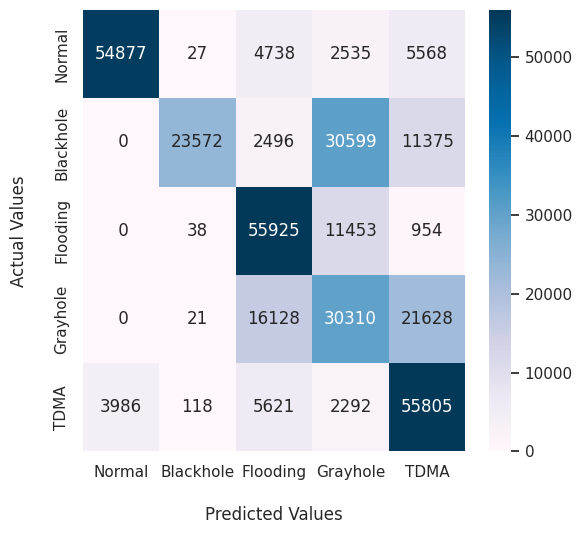

In [ ]:
print("Confusion Matrix of Multinomeal Naive Bayes") 
conf_mat(y_test, y_test_prediction)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1) 

In [ ]:
performance("Multinomeal Naive Bayes",y_test, y_test_prediction)

Model Name is : Multinomeal Naive Bayes
Accuracy : 64.83711985320497
Precision : 71.18793618932266
Recall : 64.83711985320497
F1-Score : 0.642113668777735


### **Logistic Regression (LR)**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10)
lr.fit(X_train, y_train)
y_test_prediction = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix of Logistic Regression


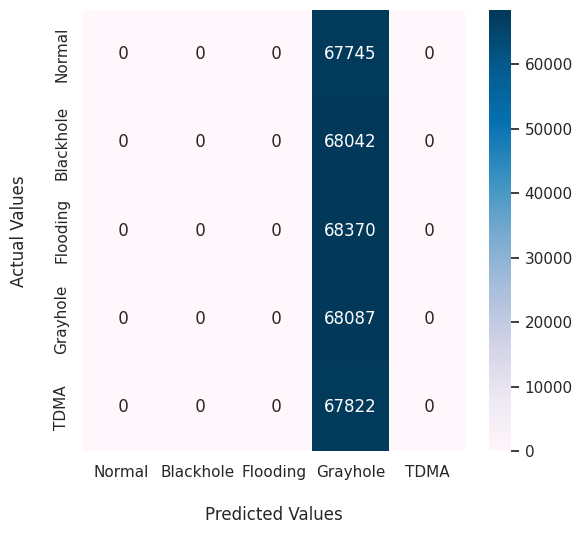

In [ ]:
print("Confusion Matrix of Logistic Regression") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Logistic Regression",y_test, y_test_prediction)

Model Name is : Logistic Regression
Accuracy : 20.02170166967589
Precision : 4.008685377495022


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall : 20.02170166967589
F1-Score : 0.06679934248104127


### **KNN**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_prediction = knn.predict(X_test)

Confusion Matrix of KNN


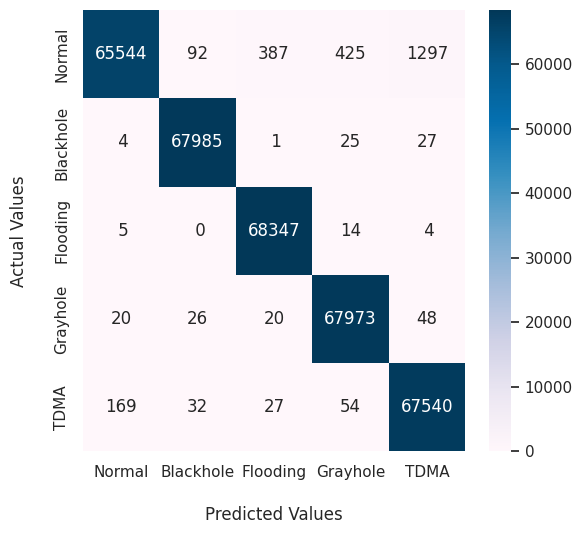

In [33]:
print("Confusion Matrix of KNN") 
conf_mat(y_test, y_test_prediction)

In [34]:
performance("KNN",y_test, y_test_prediction)

Model Name is : KNN
Accuracy : 99.21279986826087
Precision : 99.21917404879653
Recall : 99.21279986826087
F1-Score : 0.9920995546809636


### **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
y_test_prediction = svm.predict(X_test)

In [ ]:
print("Confusion Matrix of SVM") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("SVM",y_test, y_test_prediction)

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)

In [ ]:
print("Confusion Matrix of Decision Tree") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Decision Tree",y_test, y_test_prediction)

### **K-means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)
y_test_prediction=kmeans.predict(X_test)

In [ ]:
print("Confusion Matrix of K-means") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("K-means",y_test, y_test_prediction)